# Bank Campaign Project
 

* This project involves analyzing a bank's dataset using supervised machine learning algorithms. There are 4522 rows, 17 columns, and no missing values in the dataset, which contains categorical and numerical data. To understand the dataset and gain some important insights, exploratory data analysis was performed.
The goal of this project is to create four different models that can predict whether or not a customer will subscribe to a product.
Finally, the model was evaluated using the accuracy, precision, recall, and confusion matrix.


In [83]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




# Data Inspection

In [84]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()
data.shape

(4522, 17)

##  Dataset Description
- This dataset contains categorical and numerical data. It has 4522 rows, 17 columns and no missing values.
- The columns are called features and column y is the target as it describes if a customer will suscribe to a product or not.

In [85]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [86]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [87]:
#inspect the data
# Check for unique values in the data
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [88]:
#Check the shape the data frame to determine the number of rows and columns.
data.shape

(4521, 17)

In [89]:
#Check the information of the data frame to know the types of data set and also if the columns contain null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [90]:
data['age'] = data.age.astype(int)
data['balance'] = data.balance.astype(int)
data['day'] = data.day.astype(int)
data['duration'] = data.duration.astype(int)
data['campaign'] = data.campaign.astype(int)
data['pdays'] = data.pdays.astype(int)
data['previous'] = data.previous.astype(int)

In [91]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [92]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

## 
Drop duration column because until a call is made to a particular customer, we cannot really determine if they will suscribe 
or not. This will ensure producing a realistic model.

In [94]:
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis


In [95]:
sns.set()

## COUNTPLOT

<AxesSubplot:xlabel='poutcome', ylabel='count'>

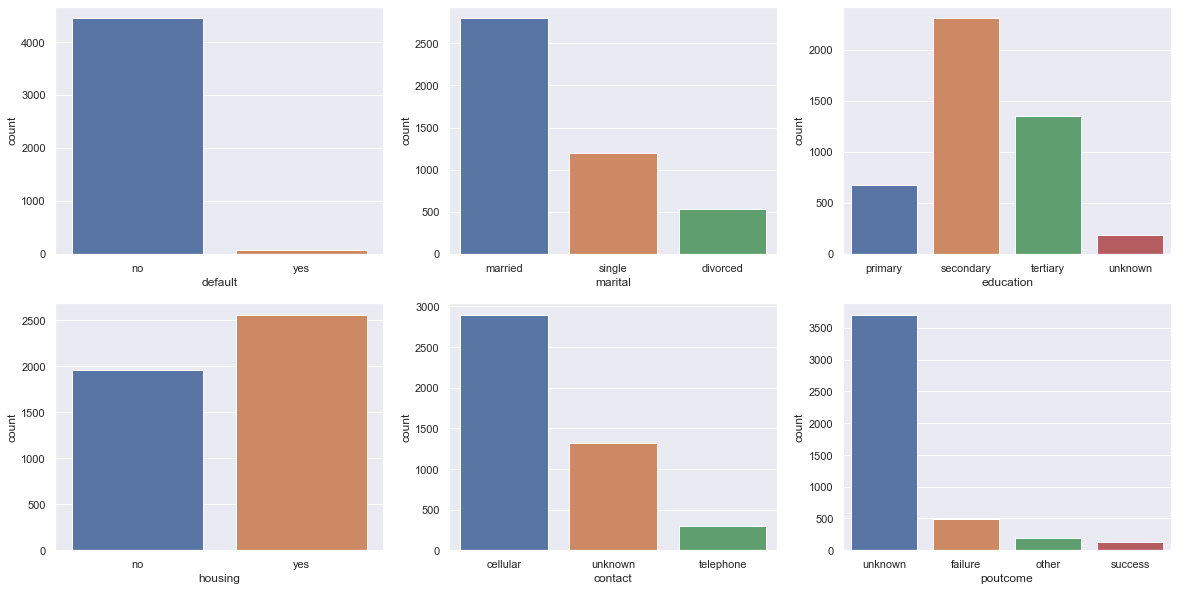

In [96]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

#univariate analysis cells
sns.countplot(x='default', data=data,  ax=axes[0,0])
sns.countplot(x='marital', data=data,  ax=axes[0,1])
sns.countplot(x='education', data=data,  ax=axes[0,2])
sns.countplot(x='housing', data=data,  ax=axes[1,0])
sns.countplot(x='contact', data=data,  ax=axes[1,1])
sns.countplot(x='poutcome', data=data,  ax=axes[1,2])



In [97]:
# The above subplots shows a count of categorical variables in the data frame.
# Default countplot shows that alot of customers are not defaulting on their credit.
# Marital countplot shows more than 60% of the customers are married.
# Education countplot shows there are more than 50% of customers with secondary education.
# House plot shows more than 50% of customers have housing loan. 
# Contact countplot shows that most of the customers were mostly communicated with cellular.
# poutcome Shows that more than 50% of the bank's marketing campaign is unknown.it also shows a very small success rate.

In [98]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Text(0, 0.5, 'Count of Product Suscription')

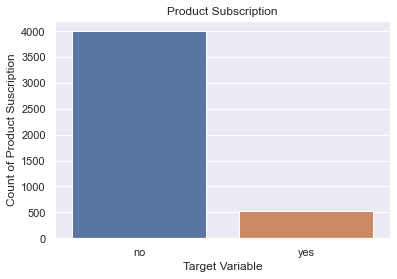

In [99]:
plt.figure(figsize=(6,4))
plt.title('Product Subscription')
sns.countplot(x='y', data=data)
plt.xlabel('Target Variable')
plt.ylabel('Count of Product Suscription')

## Observation
-The above countplot demonstrates a significant disparity, as only 521 customers have subscribed to the product, while 4000 have not.

<AxesSubplot:xlabel='previous', ylabel='Count'>

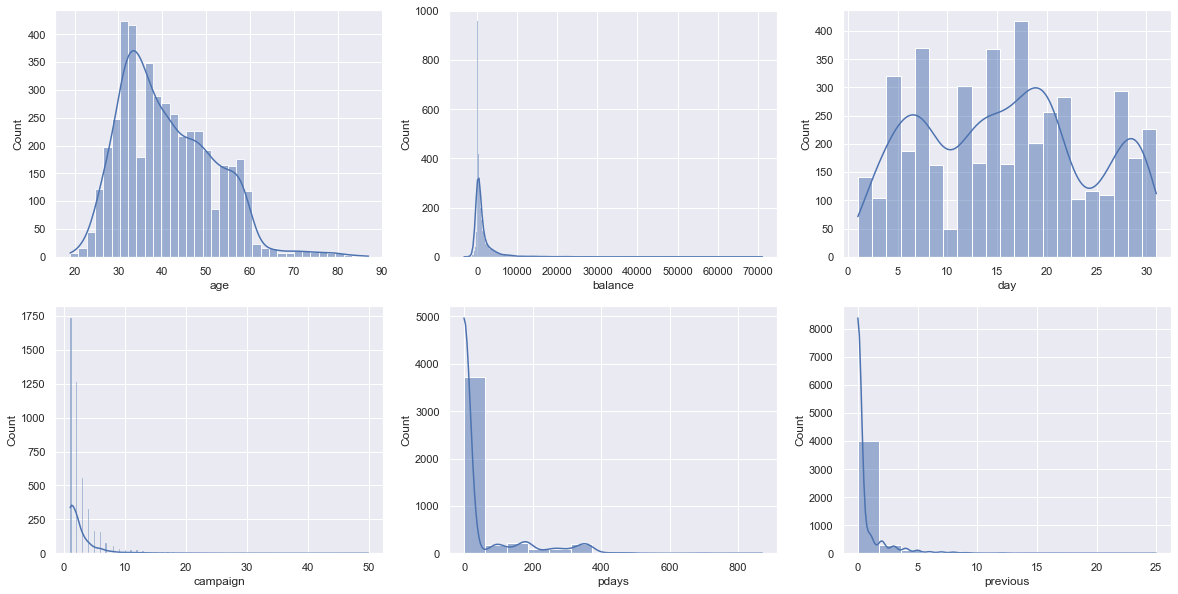

In [100]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

#univariate analysis cells
sns.histplot(x='age', data=data, kde=True, ax=axes[0,0])
sns.histplot(x='balance', data=data, kde=True, ax=axes[0,1])
sns.histplot(x='day', data=data, kde=True, ax=axes[0,2])
sns.histplot(x='campaign', data=data, kde=True, ax=axes[1,0])
sns.histplot(x='pdays', data=data, kde=True, ax=axes[1,1])
sns.histplot(x='previous', data=data, kde=True, ax=axes[1,2])

## Observation
- Age countplot seems to be  normally distributed
- Balance, campaign, pdays and previous countplots shows positive skewness(Right-Skewed). Their outliers are further towards
the right.


## Bivariate Analysis

Text(0, 0.5, 'Count of customers')

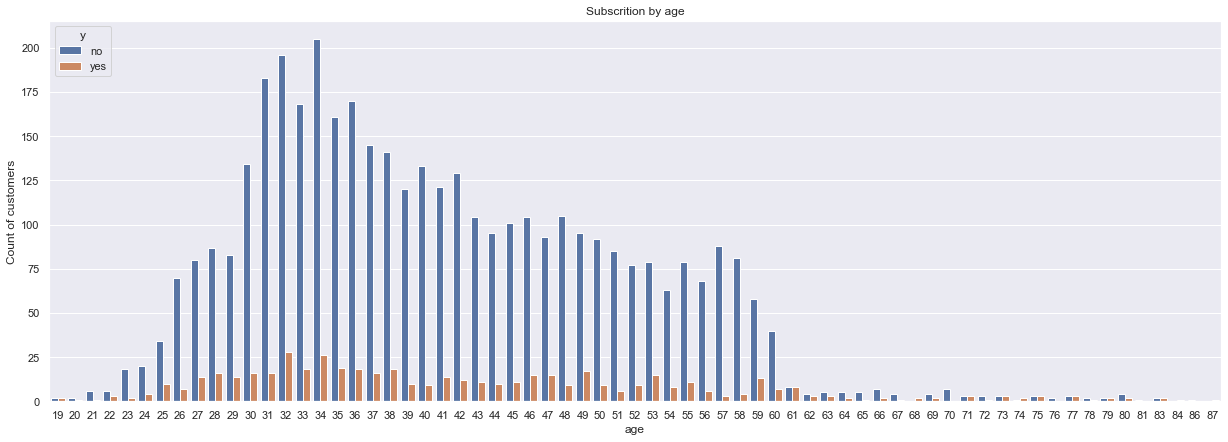

In [101]:
# What is the impact of age on product subscription?
plt.figure(figsize=(21,7))
plt.title('Subscrition by age')
sns.countplot(x='age', data=data, hue='y')
plt.xlabel('age')
plt.ylabel('Count of customers')

## Observation
The plot above depicts subscription counts as a function of age. It has been observed that a small number of customers 
between the ages of 32 and 34 are highest product subscriptions. The vast majority of the clients has yet to subscribe.

<AxesSubplot:xlabel='job', ylabel='age'>

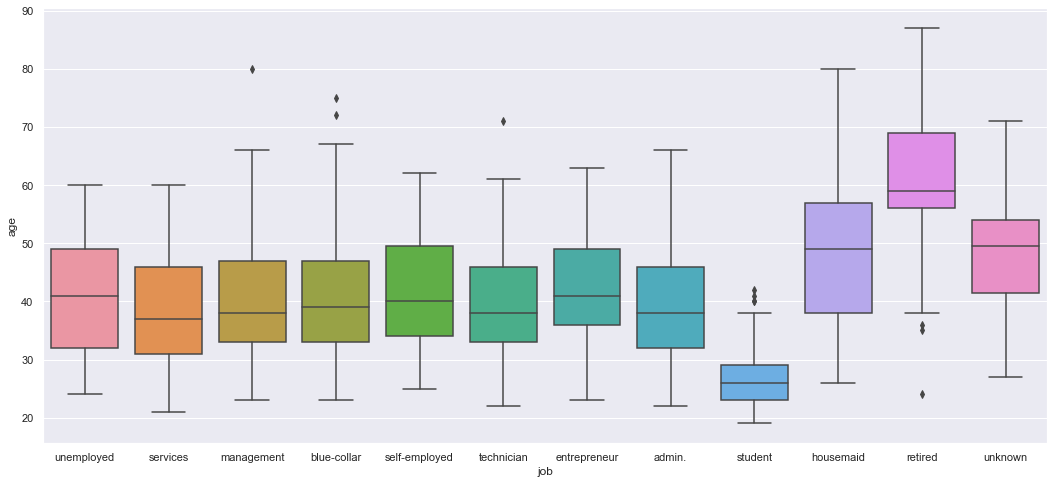

In [102]:
# What is the age distribution of customers by profession?
plt.figure(figsize=(18,8))
sns.boxplot(x='job', y='age', data=data)

## Observation
The age range of customers in their respective professions is depicted in the boxplot above.

<AxesSubplot:xlabel='education', ylabel='age'>

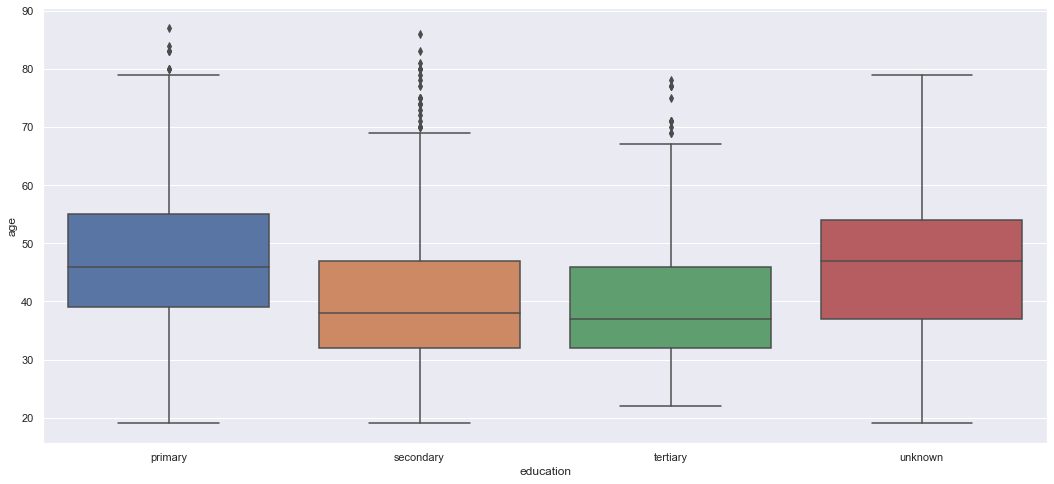

In [103]:
plt.figure(figsize=(18,8))
sns.boxplot(x='education', y='age', data=data)

## Multivariate Analysis

<AxesSubplot:>

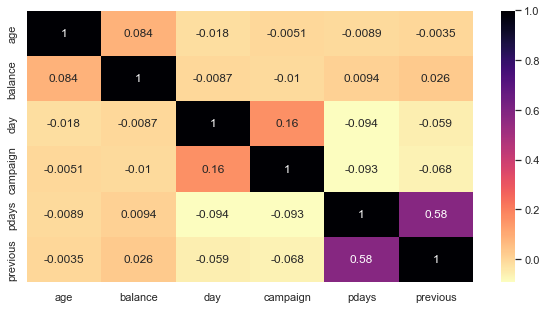

In [104]:
#multivariate analysis cells
plt.figure(figsize=(10,5))
c=data.corr()
sns.heatmap(c, cmap='magma_r',annot=True)

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. The countplot of target variable(y) from the univariate analysis shows some level of imbalance because more than 70% of customers have not subscribed.
2. The boxplot in the bivariate analysis shows the presence of outliers in the dataset.
3. The heatmap shows there is no correlation between most of the fearures.
4. Although there is a fairly positive correlation between previous and pdays.

In [105]:
# Encode values in the data set

#replace yes with 1
#replace no with 0

data = data.replace('yes', 1).replace('no', 0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,1,-1,0,unknown,0
2,33,services,married,secondary,0,4789,1,1,cellular,11,may,1,339,4,failure,0
3,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,1,330,1,failure,0
4,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,4,-1,0,unknown,0
5,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,1,-1,0,unknown,0


In [106]:
# To carryout one-hot encoding in other to convert categorical data to numerical
categorical = ['job','marital','education','contact', 'month','poutcome']

In [107]:
categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [108]:
#To join encoded variables to the original dataframe
data = pd.concat([categories_dummies,data], axis=1)
print(data.shape)
data.head()

(4521, 54)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1,0,0,0,0,0,0,0,0,0,0,...,0,0,cellular,19,oct,1,-1,0,unknown,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,cellular,11,may,1,339,4,failure,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,cellular,16,apr,1,330,1,failure,0
4,0,0,0,0,1,0,0,0,0,0,...,1,1,unknown,3,jun,4,-1,0,unknown,0
5,0,1,0,0,0,0,0,0,0,0,...,1,0,unknown,5,may,1,-1,0,unknown,0


In [109]:
data = data.drop(categorical,axis=1)
data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,default,balance,housing,loan,day,campaign,pdays,previous,y
1,0,0,0,0,0,0,0,0,0,0,...,30,0,1787,0,0,19,1,-1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,33,0,4789,1,1,11,1,339,4,0
3,0,0,0,0,1,0,0,0,0,0,...,35,0,1350,1,0,16,1,330,1,0
4,0,0,0,0,1,0,0,0,0,0,...,30,0,1476,1,1,3,4,-1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,59,0,0,1,0,5,1,-1,0,0


# Modelling

In this section, you will train and evaluate your models


## Select Target

In [110]:
y = data.y


## Select Features

In [111]:
X = data.drop('y', axis=1)

## Train Test Split

In [112]:
from sklearn.model_selection import train_test_split


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [114]:
print('shape of training feature:', X_train.shape)
print('shape of testing feature:', X_test.shape)
print('shape of training target:', y_train.shape)
print('shape of testing target:', y_train.shape)

shape of training feature: (3164, 47)
shape of testing feature: (1357, 47)
shape of training target: (3164,)
shape of testing target: (3164,)


## Import ML algorithms and initialize them

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [116]:
DT = DecisionTreeClassifier()

In [117]:
KN = KNeighborsClassifier()

In [118]:
LR = LogisticRegression()

In [119]:
RF = RandomForestClassifier()

## Train and Test the models

## Decision Tree Algorithm

In [120]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [121]:
DT_pred = DT.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [123]:
print(f'Accuracy Score = {accuracy_score(y_test,DT_pred)}')
print(f'Precision Score = {precision_score(y_test,DT_pred)}')
print(f'Recall Score is = {recall_score(y_test,DT_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,DT_pred)}')

Accuracy Score = 0.823876197494473
Precision Score = 0.25675675675675674
Recall Score is = 0.2275449101796407
Confusion Matrix is = [[1080  110]
 [ 129   38]]


In [124]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1190
           1       0.26      0.23      0.24       167

    accuracy                           0.82      1357
   macro avg       0.58      0.57      0.57      1357
weighted avg       0.81      0.82      0.82      1357



<AxesSubplot:>

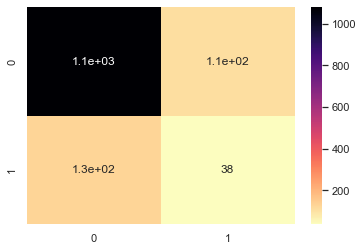

In [125]:
cm = confusion_matrix(y_test,DT_pred)
sns.heatmap(cm, annot=True, cmap='magma_r')

## K-Nearest Neighbor Algorithm

In [126]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [127]:
KN_pred = KN.predict(X_test)

In [128]:
print(f'Accuracy Score = {accuracy_score(y_test,KN_pred)}')
print(f'Precision Score = {precision_score(y_test,KN_pred)}')
print(f'Recall Score is = {recall_score(y_test,KN_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,KN_pred)}')

Accuracy Score = 0.8673544583640383
Precision Score = 0.30303030303030304
Recall Score is = 0.059880239520958084
Confusion Matrix is = [[1167   23]
 [ 157   10]]


In [129]:
print(classification_report(y_test,KN_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1190
           1       0.30      0.06      0.10       167

    accuracy                           0.87      1357
   macro avg       0.59      0.52      0.51      1357
weighted avg       0.81      0.87      0.83      1357



<AxesSubplot:>

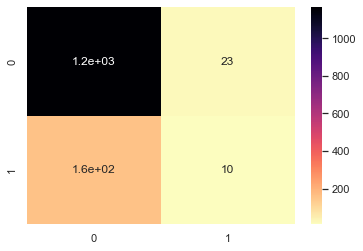

In [130]:
cm = confusion_matrix(y_test,KN_pred)
sns.heatmap(cm, annot=True, cmap='magma_r')

## Logistic Regression Algorithm

In [131]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

C:\Users\EGBE ESEOGHENE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [132]:
LR_pred = LR.predict(X_test)

In [133]:
print(f'Accuracy Score = {accuracy_score(y_test,LR_pred)}')
print(f'Precision Score = {precision_score(y_test,LR_pred)}')
print(f'Recall Score is = {recall_score(y_test,LR_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,LR_pred)}')

Accuracy Score = 0.8784082535003684
Precision Score = 0.625
Recall Score is = 0.029940119760479042
Confusion Matrix is = [[1187    3]
 [ 162    5]]


In [134]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1190
           1       0.62      0.03      0.06       167

    accuracy                           0.88      1357
   macro avg       0.75      0.51      0.50      1357
weighted avg       0.85      0.88      0.83      1357



<AxesSubplot:>

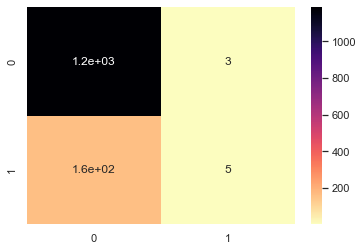

In [135]:
cm = confusion_matrix(y_test,LR_pred)
sns.heatmap(cm, annot=True, cmap='magma_r')

## Random Forest Algorithm

In [136]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
RF_pred = RF.predict(X_test)

In [138]:
print(f'Accuracy Score = {accuracy_score(y_test,RF_pred)}')
print(f'Precision Score = {precision_score(y_test,RF_pred)}')
print(f'Recall Score is = {recall_score(y_test,RF_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,RF_pred)}')

Accuracy Score = 0.8820928518791452
Precision Score = 0.6060606060606061
Recall Score is = 0.11976047904191617
Confusion Matrix is = [[1177   13]
 [ 147   20]]


In [139]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.61      0.12      0.20       167

    accuracy                           0.88      1357
   macro avg       0.75      0.55      0.57      1357
weighted avg       0.85      0.88      0.85      1357



<AxesSubplot:>

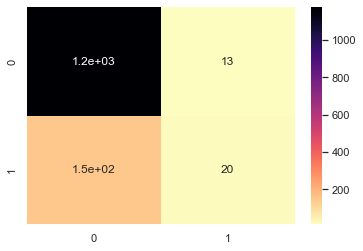

In [140]:
cm = confusion_matrix(y_test,RF_pred)
sns.heatmap(cm, annot=True, cmap='magma_r')

In [141]:
metrics = [['Accuracy',0.82,0.87,0.87,0.88], ['Precision',0.26,0.30,0.62,0.65], ['Recall',0.23,0.06,0.03,0.10]]
headers = ['Metrics','Decision Tree','KNN','Logistic Regression','Random Forest']
Labels = [1,2,3]



In [142]:
Model_Report = pd.DataFrame(metrics, Labels, headers)
Model_Report

,Metrics,Decision Tree,KNN,Logistic Regression,Random Forest
1,Accuracy,0.82,0.87,0.87,0.88
2,Precision,0.26,0.30,0.62,0.65
3,Recall,0.23,0.06,0.03,0.10


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In [143]:
##The models gave a predicted accuracy of 82%, 87%, 87% 88% for decision tree, KNN, logistic regression and random forest algorithns
-respectively.

# Random forest and logistic regression algorithm generated a fair precision value of 65% and 62% respectively.


SyntaxError: invalid syntax (3733067829.py, line 2)

## Summary

What model should be deployed to production?
Any other comments?

## 
Random forest model should be deployed because of its high accuracy and precision in comparison to others. 